# Clustering Project on "customer.csv" Dataset:


## Objectives

After some data exploratory analysis, I will deploy three different clustering algorithms and visualize the results:

*   Use scikit-learn **DBSCAN** to do Density based clustering and Matplotlib to plot clusters
*   Use scikit-learn **Hierarchical** clustering and create dendograms to visualize the clustering
*   Use scikit-learn **K-Means** clustering and 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Reading the dataset in and showing the head of the dataframe
customers = pd.read_csv('customer.csv')
customers.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Exploratory Data Analysis:
Using the **info()** and **describe()** methods to see some statistics of the dataframe:

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
print('Null Values In Dataset: ', customers.isnull().sum())
print()
print('Duplicate Values In Dataset: ', customers.duplicated().sum())
print()

Null Values In Dataset:  CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Duplicate Values In Dataset:  0



We need to convert the 'Gender' column to **integer type**:

In [45]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le = LabelEncoder()

In [49]:
customers['Gender'] = le.fit_transform(customers['Gender'])

# Display the updated DataFrame
print(customers)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1       1   19                  15                      39
1             2       1   21                  15                      81
2             3       0   20                  16                       6
3             4       0   23                  16                      77
4             5       0   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196       0   35                 120                      79
196         197       0   45                 126                      28
197         198       1   32                 126                      74
198         199       1   32                 137                      18
199         200       1   30                 137                      83

[200 rows x 5 columns]


In [50]:
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Implementing Different Clustering Algorithms with Visualizations


## 1-DBSCAN:

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from itertools import product
from sklearn.metrics import silhouette_score

In [160]:
X = customers[['Age', 'Annual Income (k$)','Spending Score (1-100)']]

**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area and 
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.

In [188]:
# eps and min_samples values to be investigated
eps_values = np.arange(8, 12.25, 0.25) 
min_samples = np.arange(3, 10) 

DBSCAN_params = list(product(eps_values, min_samples))

In [189]:
num_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
    num_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(X, DBS_clustering.labels_))

**A heatplot below shows how many clusters were generated by the DBSCAN algorithm for the respective parameters combinations.**

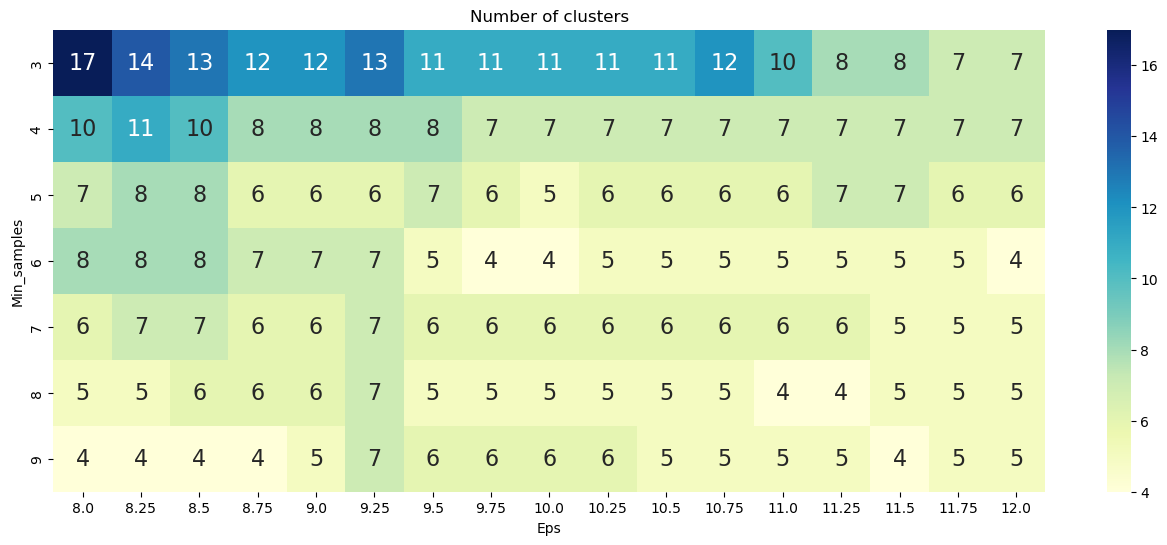

In [194]:
# Creating the heatmap for DBSCAN respective parameters combinations
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = num_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(16,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

Although the number of clusters vary from **17 to 4**, the most of the combinations gives **4-7 clusters**. To decide which combination to choose I will use the **silhuette score** which is a metric, and I will plot it as a heatmap again:

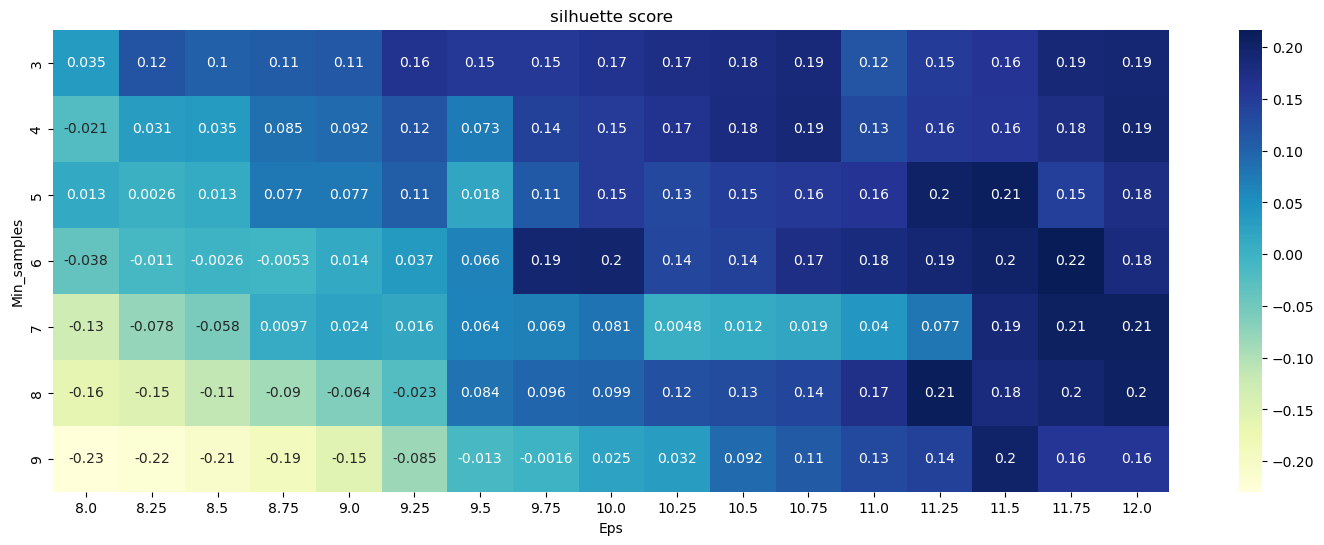

In [192]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
ax.set_title('silhuette score')
plt.show()

As it is clear from the heatmap above, the global maximum is **0.26** for **eps=12.5 and min_samples=4**

In [195]:
DBS_clustering = DBSCAN(eps=12.5, min_samples=4).fit(X)
DBSCAN_clustered = X.copy()

# append labels to points
DBSCAN_clustered.loc[:, 'Cluster'] = DBS_clustering.labels_ 

In [196]:
# Checking sizes of clusters
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

,DBSCAN_size
Cluster,
-1,18
0,112
1,8
2,34
3,24
4,4


**The dataframe above shows that the DBSCAN model has created 5 clusters plus outliers cluster (-1)**

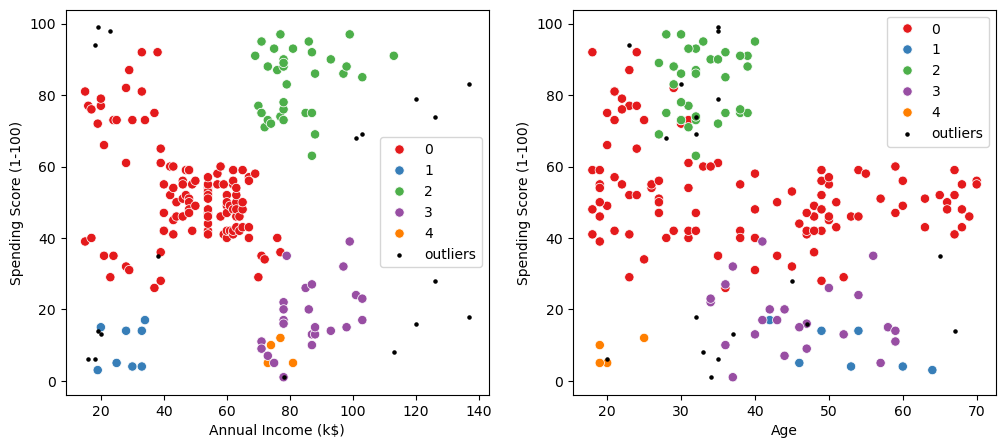

In [203]:
outliers = DBSCAN_clustered[DBSCAN_clustered['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))


sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                    hue='Cluster', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(x='Age', y='Spending Score (1-100)',
                    data=DBSCAN_clustered[DBSCAN_clustered['Cluster'] != -1],
                    hue='Cluster', palette='Set1', ax=axes[1], legend='full', s=45)

axes[0].scatter(outliers['Annual Income (k$)'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Age'], outliers['Spending Score (1-100)'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')

plt.show()

## 2- Hierarchical clustering 

In [236]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
import pylab
from scipy.cluster import hierarchy

In [294]:
X = customers[['Annual Income (k$)','Spending Score (1-100)']]

In [295]:
scaler = StandardScaler() 

In [296]:
# Scaling and assigning the scaled features to feature_mtx variable
feature_mtx = scaler.fit_transform(X)
feature_mtx[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [297]:
# Calculating the distance matrix based on the euclidean distance between datapoints
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         1.63050555 1.28167999 ... 4.44935328 4.72749573 4.96007568]
 [1.63050555 0.         2.91186723 ... 4.24551281 5.25987762 4.65731761]
 [1.28167999 2.91186723 0.         ... 4.95958139 4.64193658 5.50147501]
 ...
 [4.44935328 4.24551281 4.95958139 ... 0.         2.21418015 0.54622499]
 [4.72749573 5.25987762 4.64193658 ... 2.21418015 0.         2.52340145]
 [4.96007568 4.65731761 5.50147501 ... 0.54622499 2.52340145 0.        ]]


In [310]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

/var/folders/95/8l2pb5kn5vj_whzknk7tcrv80000gn/T/ipykernel_24923/649183402.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')


### Dendrogram visualization:

/var/folders/95/8l2pb5kn5vj_whzknk7tcrv80000gn/T/ipykernel_24923/1560527622.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')


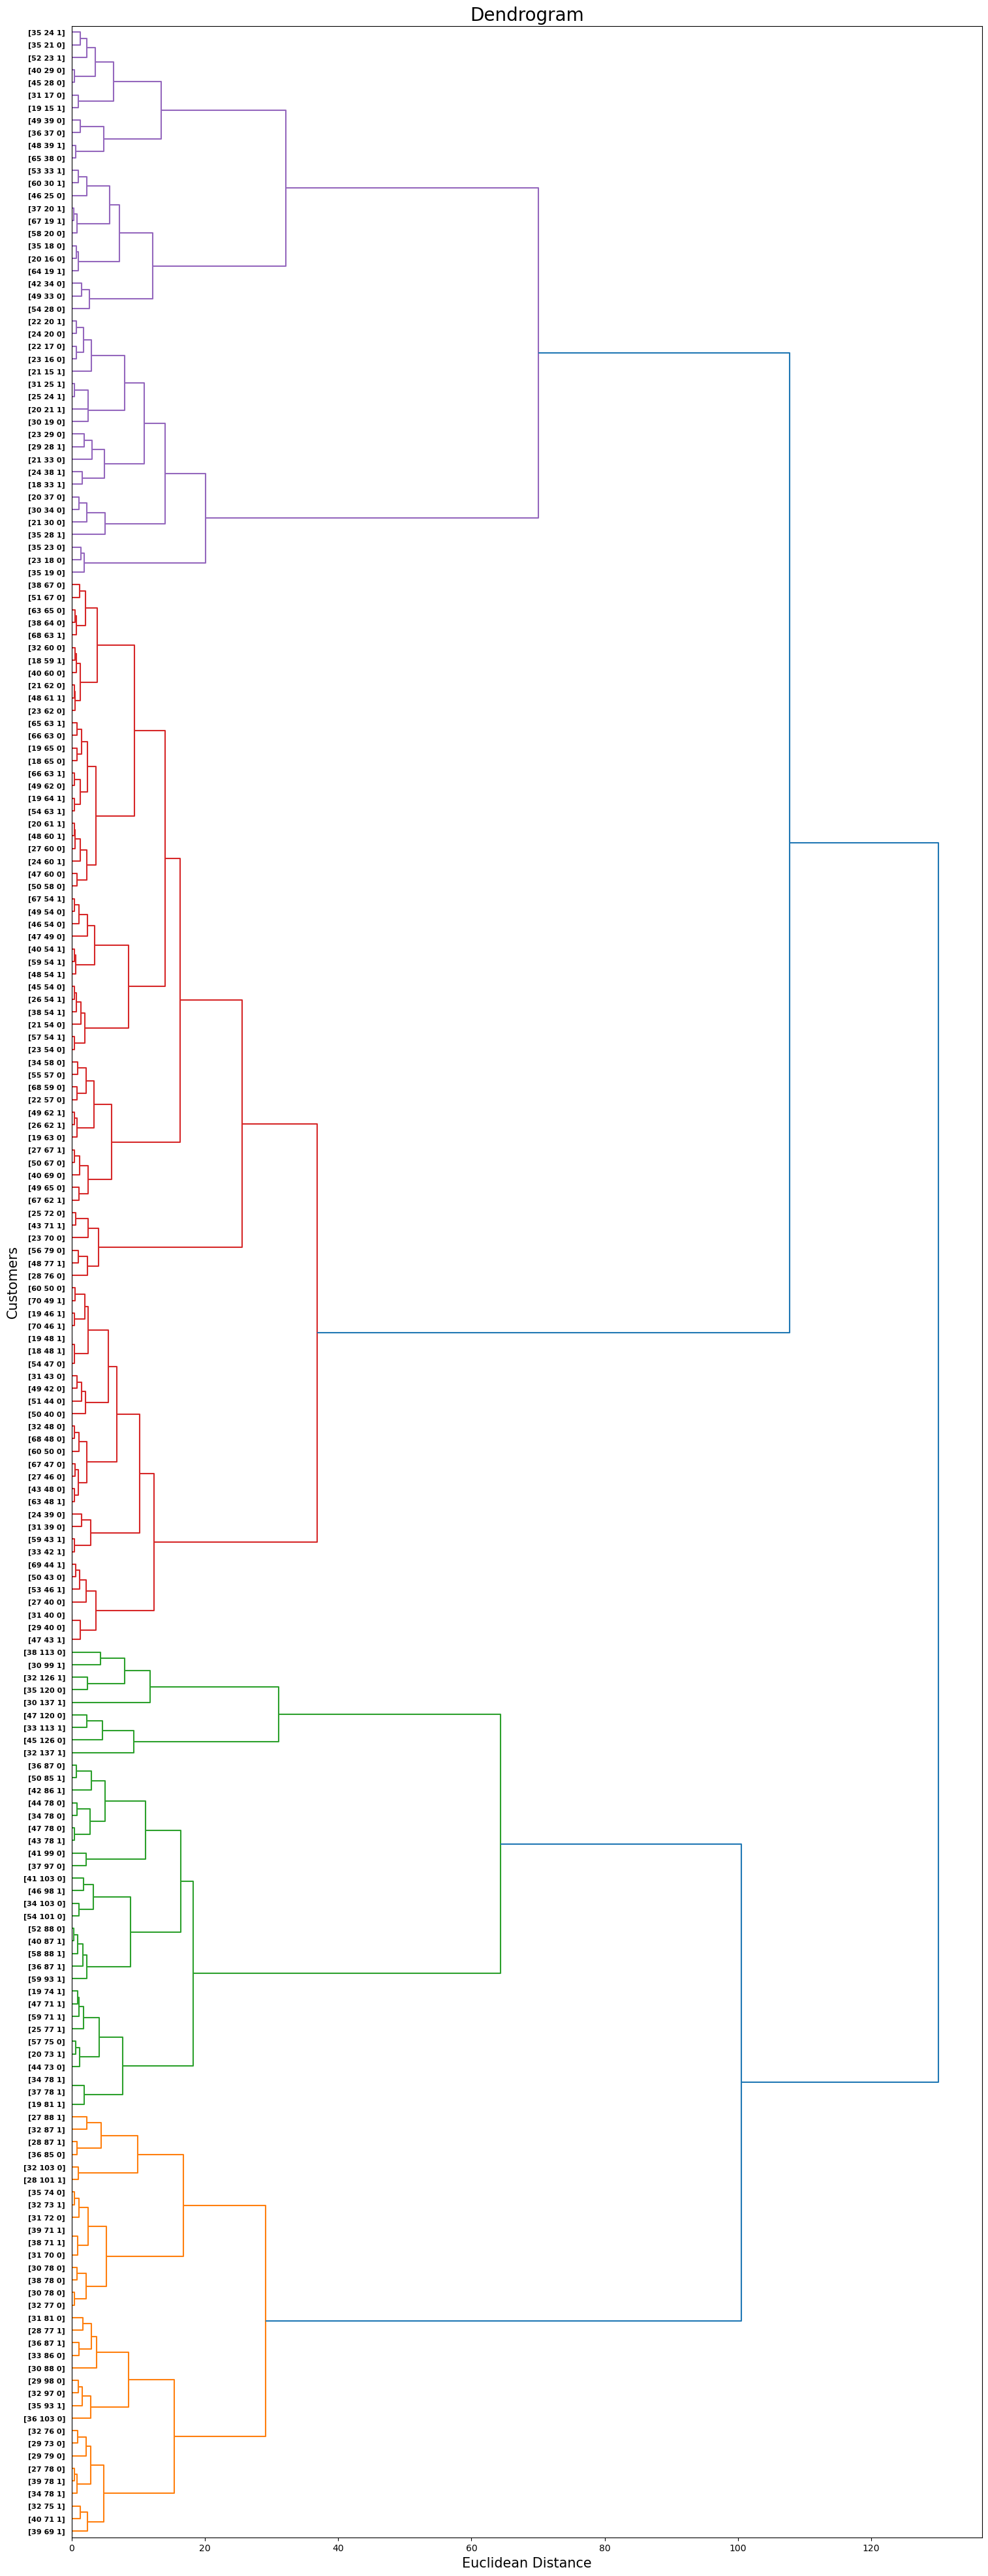

In [311]:
# Creating a hierarchical clustering linkage matrix using the complete-linkage method
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'ward')

# Define the leaf label function to include 'Age' and 'Annual Income'
def llf(id):
    age = int(customers['Age'][id])
    income = int(customers['Annual Income (k$)'][id])
    return '[%s %s %s]' % (customers['Age'][id], customers['Annual Income (k$)'][id], customers['Gender'][id])

# Vertical dendrogram
fig = plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z_using_dist_matrix, leaf_label_func=llf, orientation='right')

# Increase the size and boldness of y-axis labels
plt.tick_params(axis='y', labelsize=8)

# Make y-axis labels bold
for label in plt.gca().get_yticklabels():
    label.set_fontweight('bold')
    
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Euclidean Distance', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.show()

Now, we can use the 'AgglomerativeClustering' function from scikit-learn library to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

*   Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
*   Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
*   Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [312]:
aggCluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
labels = aggCluster.fit_predict(dist_matrix)

labels

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:833: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 0, 3, 0, 3,
       2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0])

In [313]:
# Adding the cluster labels as a new column to our dataframe
customers['cluster_'] = labels
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_
0,1,1,19,15,39,1
1,2,1,21,15,81,4
2,3,0,20,16,6,1
3,4,0,23,16,77,4
4,5,0,31,17,40,1


## Visualizing Clusters:

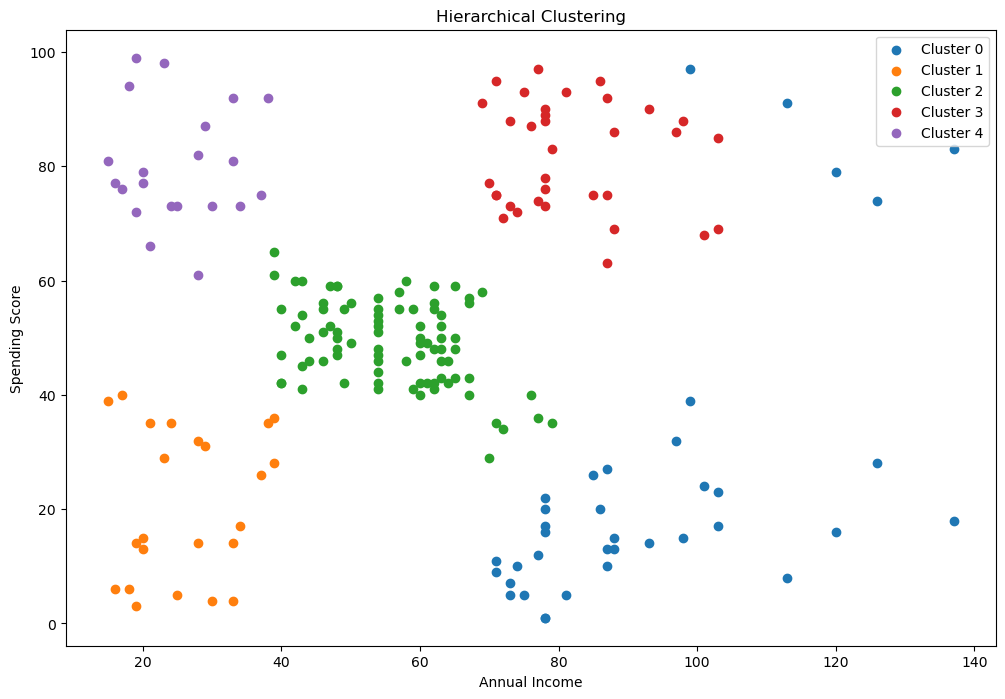

In [314]:
# Visualize the clusters
plt.figure(figsize=(12, 8))

# Scatter plot for each cluster
for cluster_num in range(5):
    plt.scatter(X[labels == cluster_num]['Annual Income (k$)'], 
                X[labels == cluster_num]['Spending Score (1-100)'],
                label=f'Cluster {cluster_num}')

plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [317]:
# To see the gender distribution in each cluster
customers.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         0         16
          1         21
1         0         14
          1          9
2         0         51
          1         34
3         0         19
          1         15
4         0         12
          1          9
Name: cluster_, dtype: int64

**Now we can look at the characteristics of each cluster:**

In [321]:
clusters_Stat = customers.groupby(['cluster_', 'Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
clusters_Stat

Age  Annual Income (k$)  Spending Score (1-100)
cluster_ Gender                                                       
0        0       42.875000           96.187500               28.687500
         1       37.666667           91.285714               22.095238
1        0       43.214286           27.357143               21.714286
         1       48.333333           24.666667               19.666667
2        0       40.509804           55.784314               48.647059
         1       45.441176           55.852941               49.852941
3        0       31.736842           82.842105               81.315789
         1       33.800000           80.400000               82.266667
4        0       25.583333           24.583333               81.833333
         1       25.000000           25.777778               77.666667

Let's interpret the above table:

**Men**:

*   Cluster 0: with the most **Annual Income** on average.
*   Cluster 1: with the most **Average Age** , but the least **Spending Score** and **Annual Income**.
*   Cluster 3: with the most **Spending Score**.



**Women**:

*   Cluster 0: with the most **Annual Income** on average, the most **Spending Score**
*   Cluster 1: with the most **Average Age** , but the least **Spending Score** and one of the least **Annual Incomes**.
*   Cluster 4: with the most **Spending Score**, yet the least **Annual Incomes**.

Please notice that we did not use **Gender**  and **Age** of customers in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite a high accuracy.